## <font color="black"><h4 align="center">7-6 Handling Missing Data - replace method</font>

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv("7-6_weather_data.csv")
df.head(2)

,day,temperature,windspeed,event,Unnamed: 4
0,1/1/2017,32,6,Rain,NaN
1,1/2/2017,-99999,7,Sunny,NaN


**Replacing single value**

In [3]:
new_df = df.replace(-99999, value=np.NaN)
new_df.head(2)

,day,temperature,windspeed,event,Unnamed: 4
0,1/1/2017,32.0,6.0,Rain,NaN
1,1/2/2017,NaN,7.0,Sunny,NaN


**Replacing list with single value**

In [4]:
new_df = df.replace(to_replace=[-99999,-88888], value=0)
new_df.head(2)

,day,temperature,windspeed,event,Unnamed: 4
0,1/1/2017,32,6,Rain,NaN
1,1/2/2017,0,7,Sunny,NaN


**Replacing per column**

In [5]:
new_df = df.replace({
        'temperature': -99999,
        'windspeed': -99999,
        'event': '0'
    }, np.nan)
new_df.head(2)

,day,temperature,windspeed,event,Unnamed: 4
0,1/1/2017,32.0,6.0,Rain,NaN
1,1/2/2017,NaN,7.0,Sunny,NaN


**Replacing by using mapping**

In [6]:
new_df = df.replace({
        -99999: np.nan,
        'no event': 'Sunny',
    })
new_df.head(2)

,day,temperature,windspeed,event,Unnamed: 4
0,1/1/2017,32.0,6.0,Rain,NaN
1,1/2/2017,NaN,7.0,Sunny,NaN


**Regex**

In [7]:
# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.
new_df = df.replace({'temperature': '[A-Za-z]', 'windspeed': '[a-z]'},'', regex=True) 
new_df.head(2)

,day,temperature,windspeed,event,Unnamed: 4
0,1/1/2017,32,6,Rain,NaN
1,1/2/2017,-99999,7,Sunny,NaN


**Replacing list with another list**

In [8]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df.head(2)

,score,student
0,exceptional,rob
1,average,maya


In [43]:
df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica



### 7-B staff list data
### Question 1: What is the average salary for people from different department?

In [21]:
df = pd.read_csv('7-B_staff_list_sm.csv')

In [23]:
df['date'] = pd.to_datetime(df['Hiredate'])

In [55]:
df['years'] = [x.days for x in df['years']]

In [60]:
df['years'] = (df['years'] / 365).apply(np.ceil)

In [77]:
df['Salary'] = df['Salary'].apply(lambda x: x.replace(',',''))

In [79]:
df['Salary'] = df['Salary'].astype('float')

In [86]:
pd.pivot_table(df, index = 'Dept', values = 'Salary', 
               aggfunc = 'mean').sort_values (by = 'Salary')

,Salary
Dept,
MKTG,3688.539000
ACCT,3728.432500
SALE,3739.538276
PROD,3873.601068


## Question 2: For different department, do people's salary change based on years of employment?



In [87]:
pd.pivot_table(df, index = 'years', columns = 'Dept', values = 'Salary', aggfunc = 'mean')

Dept,ACCT,MKTG,PROD,SALE
years,,,,
1.0,4695.065,3866.530000,3406.221667,3866.530000
2.0,NaN,5339.470000,4200.239375,5339.470000
3.0,3608.752,4050.646667,3692.628333,2669.735000
4.0,3406.225,NaN,3759.112500,4142.695000
5.0,NaN,NaN,3881.865833,3498.270000
6.0,NaN,3130.040000,4464.907500,5339.470000
7.0,3314.160,4050.640000,4161.114000,3498.270000
8.0,NaN,3191.413333,3498.275714,3130.030000
9.0,3866.520,NaN,4713.470000,NaN


### Create 3 groups based on employment years with 33.% 66.7% quantile cut

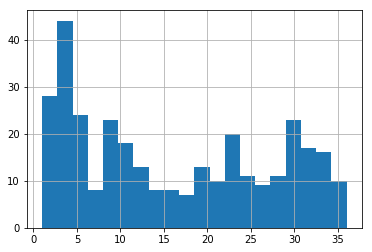

In [92]:
# collaps some years
% matplotlib inline
df['years'].hist(bins= 20)

In [98]:
cut, bin = pd.qcut(df['years'], [0, 0.33, 0.67, 1], ['short', 'middle','long'], True)

In [99]:
bin

array([ 1. ,  8. , 22.4, 36. ])

In [100]:
df['employ'] = pd.qcut(df['years'], [0, 0.33, 0.67, 1], ['1-8', '8-22.4','22.4-36'])

In [103]:
pivot = df.pivot_table(index = 'employ', columns = 'Dept', values = 'Salary', aggfunc = 'mean')

In [104]:
pivot = pivot.reset_index()

In [107]:
pivot.columns = ['employ_year_group', 'ACCT','MKTG','PROD','SALE']

In [109]:
pivot[['employ_year_group','MKTG', 'ACCT','SALE','PROD']]

,employ_year_group,MKTG,ACCT,SALE,PROD
0,1-8,3749.354545,3756.050,3829.690000,3890.630595
1,8-22.4,3291.146250,3921.757,3787.608571,3947.531733
2,22.4-36,3916.736364,3452.255,3636.370833,3780.597333


In [110]:
import matplotlib.pyplot as plt

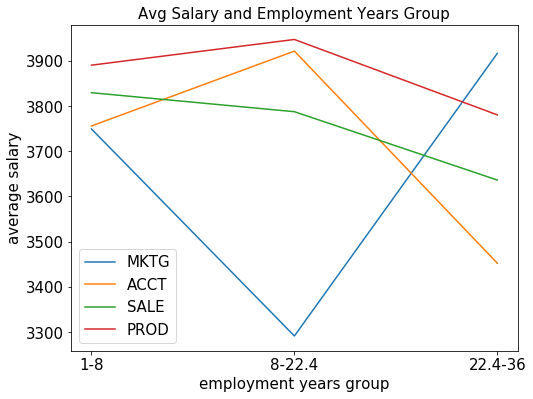

In [125]:
fig = plt.figure(figsize = (8,6))

plt.plot(pivot['MKTG'], label = 'MKTG')
plt.plot(pivot['ACCT'], label = 'ACCT')
plt.plot(pivot['SALE'], label = 'SALE')
plt.plot(pivot['PROD'], label = 'PROD')
plt.xticks([0,1,2],['1-8','8-22.4','22.4-36'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('employment years group', fontsize = 15)
plt.ylabel('average salary', fontsize = 15 )
plt.legend( fontsize = 15)
plt.title('Avg Salary and Employment Years Group', fontsize = 15)

## Observations

### - For all departments, large years of employment doesn't mean a higher salary 
### - Except for the marketing department, 8-22.4 years of employemnt have the highest salary
### - The product department has the highest average salary for 1-22.4 years of employemnt, but marketing department with 22.4-36 years of employment has the highest salary